<a href="https://colab.research.google.com/github/djadczak956/MA4635/blob/main/Jadczak_Damian_HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gather the Auto dataset

In [146]:
! wget https://www.statlearning.com/s/Auto.csv
! pip install seaborn

--2025-04-10 23:59:31--  https://www.statlearning.com/s/Auto.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe058464c2528214f6bba/1610604632209/Auto.csv [following]
--2025-04-10 23:59:32--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe058464c2528214f6bba/1610604632209/Auto.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17681 (17K) [text/csv]
Saving to: ‘Auto.csv.14’

Auto.csv.14         100%[===================>]  17.27K  --.-KB/s    in 0.001s  

2025-04-10

## Set the problem up

In [147]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt

In [148]:
!pip install ISLP

In [149]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [150]:
data = pd.read_csv('Auto.csv')
data = data.replace('?', np.nan) # For the question marks
data = data.dropna() # Drop all rows with at least one missing value
quantitatives = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
data[quantitatives] = data[quantitatives].astype(float)

## Scatter matrix (a)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

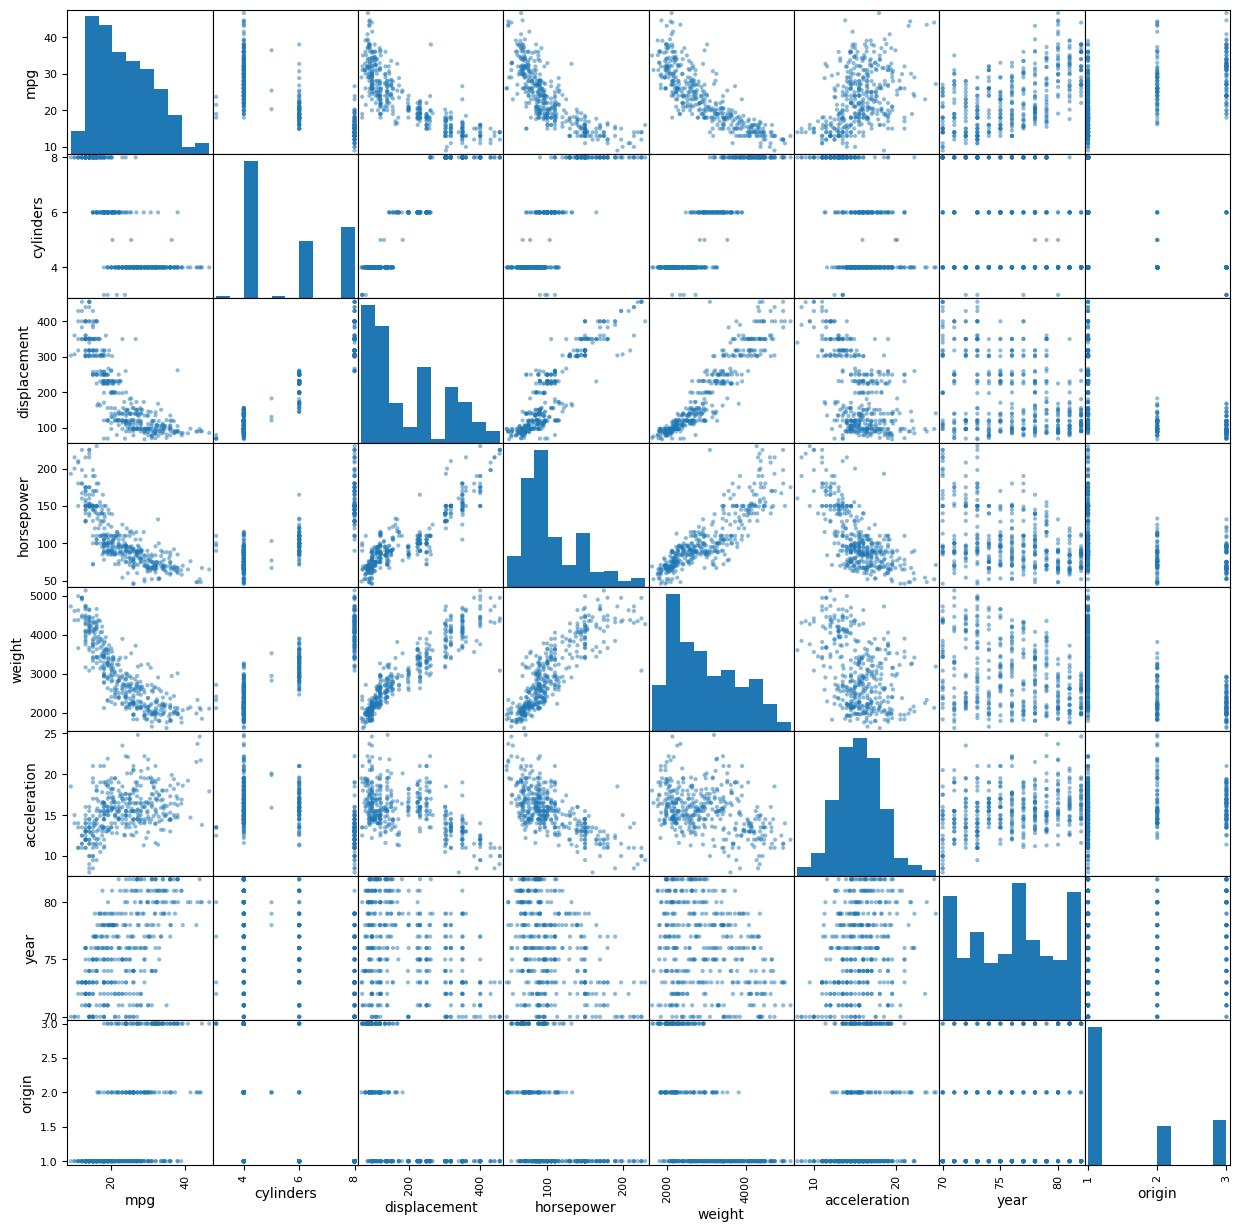

In [151]:
pd.plotting.scatter_matrix(data, figsize=(15,15))

## Correlation matrix (b)
I have to start by selecting quantitative variables to calculate a correlation matrix for. Then I can just use the DataFrame.corr() method.

In [152]:
corr = data[quantitatives].corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Ordinary least squares (c)

In [153]:
y = data['mpg']
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']).fit_transform(data)
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          2.04e-139
Time:                        23:59:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707   

## Diagnostic plots (d)

In [154]:
# Given a SM model's results, this will make a fitted values vs. residuals plot.
def fit_vs_res(model_results):
  ax = plt.subplots(figsize=(8,8))[1]
  ax.scatter(model_results.fittedvalues, model_results.resid)
  ax.set_xlabel('Fitted values')
  ax.set_ylabel('Residuals')
  ax.set_title('Fitted values vs. Residuals')
  ax.axhline(y=0, color='r', linestyle='--')
  plt.show()

In [155]:
# From the book for finding outliers via leverage and index.
def leverage(model_results, X):
  infl = model_results.get_influence()
  ax = plt.subplots(figsize=(8,8))[1]
  ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
  ax.set_xlabel('Index')
  ax.set_ylabel('Leverage')
  ax.set_title('Leverage vs. Index')
  plt.show()
  np.argmax(infl)

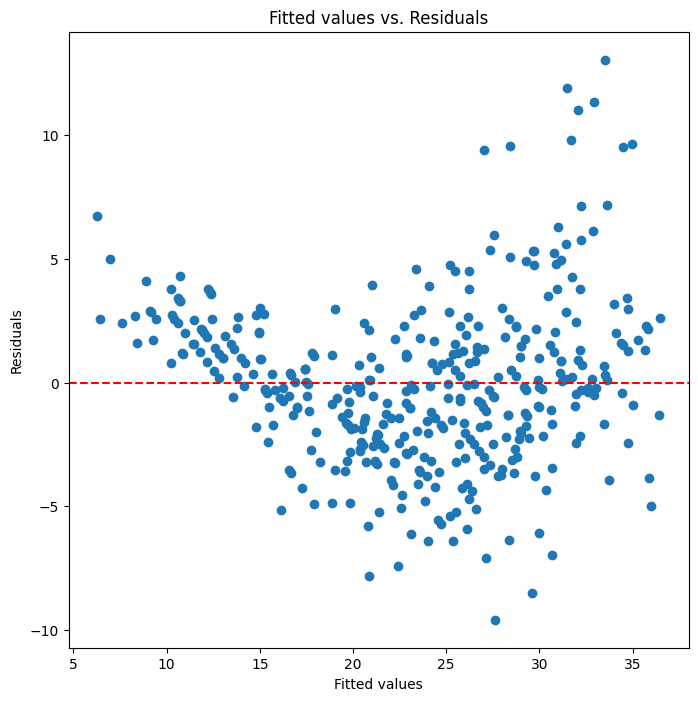

In [156]:
fit_vs_res(results1)

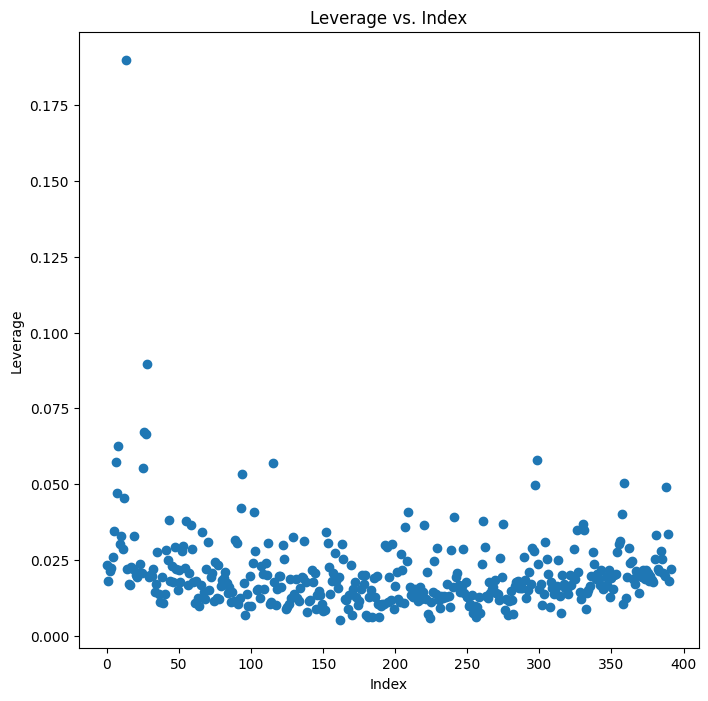

In [157]:
leverage(results1, X)

## Different fits (e)

In [170]:
quantitatives2 = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
q2_copy = quantitatives2.copy()

# Adding interactions to data
for i in range(len(quantitatives2)):
  for j in range(i+1, len(quantitatives2)):
    new_feature = quantitatives2[i] + ' * ' + quantitatives2[j]
    data[new_feature] = data[quantitatives2[i]] * data[quantitatives2[j]]
    q2_copy.append(new_feature)

data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cylinders * displacement,...,origin * year * acceleration * weight * horsepower * displacement * weight,origin * year * acceleration * weight * horsepower * displacement * acceleration,origin * year * acceleration * weight * horsepower * displacement * year,origin * year * acceleration * weight * horsepower * displacement * origin,origin * year * acceleration * weight * horsepower * displacement * cylinders * displacement,origin * year * acceleration * weight * horsepower * displacement * cylinders * horsepower,origin * year * acceleration * weight * horsepower * displacement * cylinders * weight,origin * year * acceleration * weight * horsepower * displacement * cylinders * acceleration,origin * year * acceleration * weight * horsepower * displacement * cylinders * year,origin * year * acceleration * weight * horsepower * displacement * cylinders * origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,2456.0,...,4.116131e+14,1.409634e+12,8.222865e+12,1.174695e+11,2.885051e+14,1.221683e+14,3.292905e+15,1.127707e+13,6.578292e+13,9.397560e+11
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,2800.0,...,6.340251e+14,1.974354e+12,1.201781e+13,1.716830e+11,4.807123e+14,2.266215e+14,5.072201e+15,1.579483e+13,9.614245e+13,1.373464e+12
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,2544.0,...,4.336261e+14,1.388209e+12,8.834059e+12,1.262008e+11,3.210549e+14,1.514410e+14,3.469009e+15,1.110567e+13,7.067247e+13,1.009607e+12
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,2432.0,...,4.514314e+14,1.577972e+12,9.204834e+12,1.314976e+11,3.198022e+14,1.577972e+14,3.611451e+15,1.262377e+13,7.363867e+13,1.051981e+12
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,2416.0,...,3.696653e+14,1.125395e+12,7.502630e+12,1.071804e+11,2.589479e+14,1.200421e+14,2.957323e+15,9.003156e+12,6.002104e+13,8.574435e+11


In [171]:
X_interaction = MS(q2_copy).fit_transform(data)
X_interaction = sm.add_constant(X_interaction)
model2 = sm.OLS(y, X_interaction)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          4.01e-155
Time:                        00:09:15   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept         

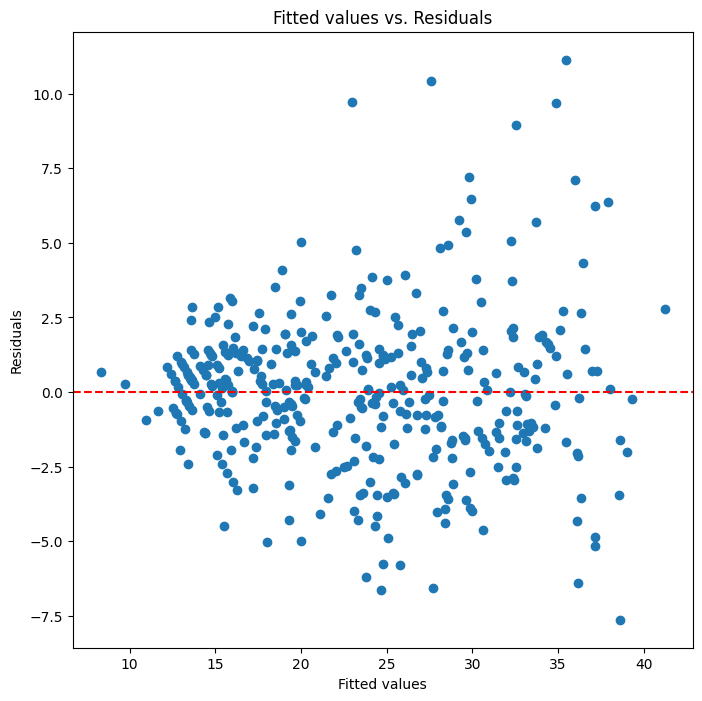

In [172]:
fit_vs_res(results2)

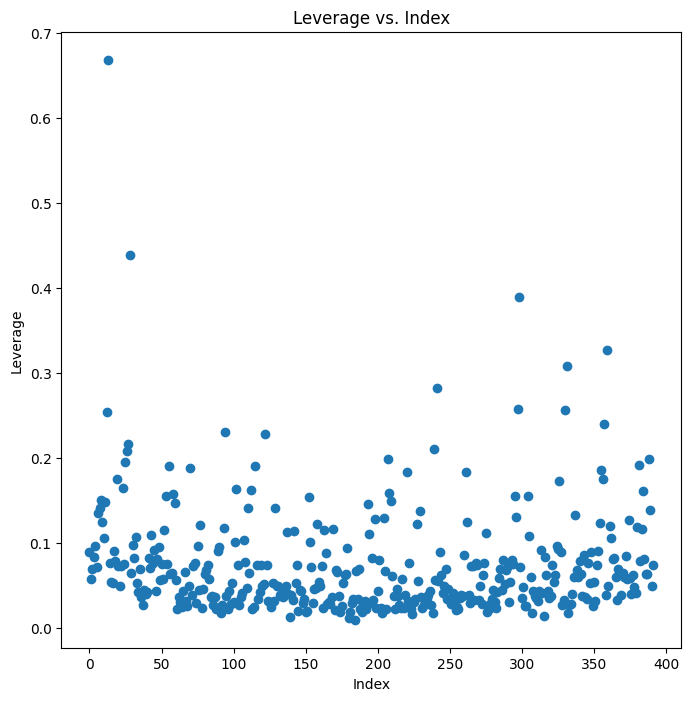

In [173]:
leverage(results2, X_interaction)